## Step 1:Import Required library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Step 2:Load the dataset


In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3:Data Preprocessing

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.drop(['Gender'],axis=1,inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


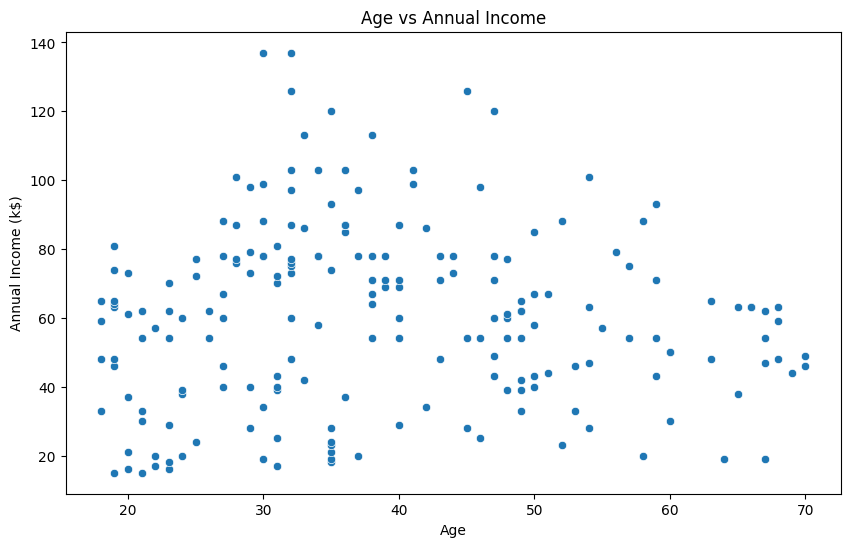

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

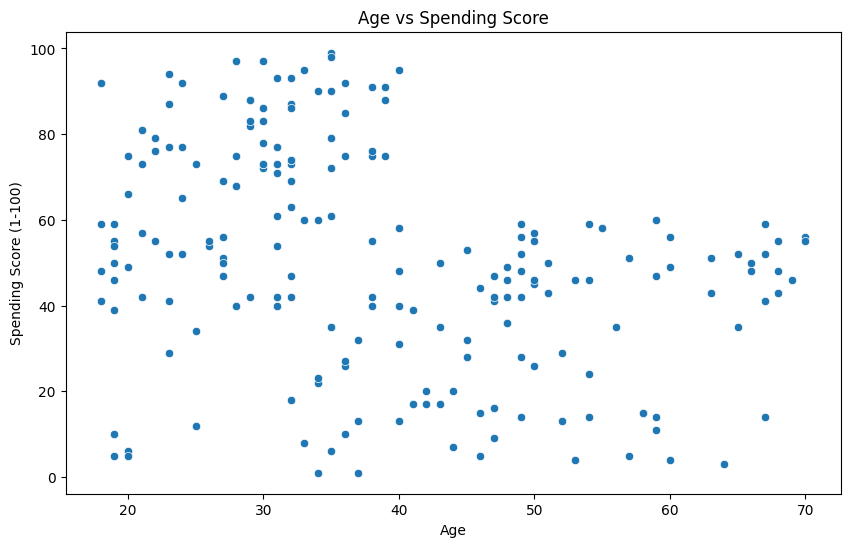

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

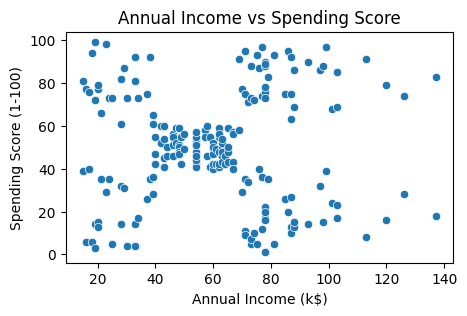

In [7]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Step 5: Feature Engineering

In [8]:
def skewness_name(skewness):
    if skewness > 0:
        return 'Right Skewed'
    elif skewness < 0:
        return 'Left Skewed'
    else:
        return 'Normal'
print("Skewness of Age:", skewness_name(df['Age'].skew()),df['Age'].skew())
print("Skewness of Annual Income:", skewness_name(df['Annual Income (k$)'].skew()),df['Annual Income (k$)'].skew())
print("Skewness of Spending Score:", skewness_name(df['Spending Score (1-100)'].skew()),df['Spending Score (1-100)'].skew())

Skewness of Age: Right Skewed 0.48556885096681657
Skewness of Annual Income: Right Skewed 0.3218425498619055
Skewness of Spending Score: Left Skewed -0.047220201374263374


In [9]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df=pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

model=KMeans(n_clusters=5, random_state=42)
model.fit(df)
df['Cluster']=model.labels_
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


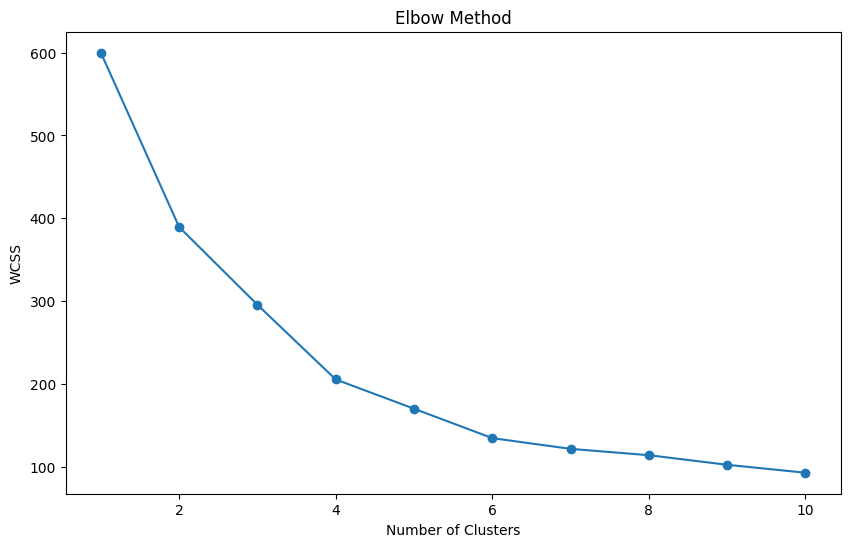

In [12]:
from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("Cluster",axis=1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

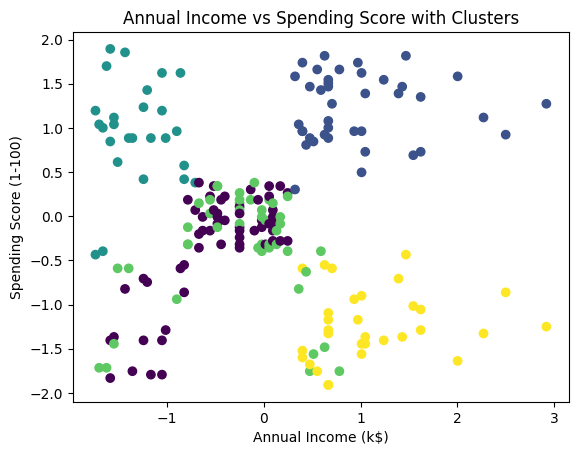

In [13]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'])
plt.title('Annual Income vs Spending Score with Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [14]:
df.to_csv('clustered_mall_customers.csv', index=False)


In [15]:
data=pd.read_csv('clustered_mall_customers.csv')
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.424569,-1.738999,-0.434801,2
1,-1.281035,-1.738999,1.195704,2
2,-1.352802,-1.700830,-1.715913,3
3,-1.137502,-1.700830,1.040418,2
4,-0.563369,-1.662660,-0.395980,2


In [16]:
x=data.drop('Cluster',axis=1)
y=data['Cluster']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=dt_model.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nAccuracy Score:", accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  2 10  0]
 [ 0  0  0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      0.83      0.91        12
           4       1.00      1.00      1.00        10

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40


Accuracy Score: 0.95


In [20]:
#save the model
import joblib
joblib.dump(dt_model,'kmeans_decision_tree_model.pkl')


['kmeans_decision_tree_model.pkl']